In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("clean_data.csv")
df.head()

,Unnamed: 0,ID,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,City,Time_taken (min),approx_distance_km,travel_time,distance_km
0,0,0xcdcd,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,3.0,4.0,2,3.0,0.0,3.0,46,10.988439,28.450000,16.8077
1,1,0xd987,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,5.0,3.0,1,1.0,0.0,3.0,23,6.279108,13.115000,8.8577
2,2,0x2784,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,4.0,2.0,1,1.0,0.0,3.0,21,14.127993,18.655000,21.3843
3,3,0xc8b6,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,4.0,1.0,0,0.0,0.0,3.0,20,3.139554,8.308333,4.8283
4,4,0xdb64,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,3.0,4.0,1,1.0,0.0,3.0,41,20.407102,24.350000,23.4788


In [3]:
df.shape

(37909, 19)

In [4]:
df.isnull().sum()

Unnamed: 0                     0
ID                             0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
approx_distance_km             0
travel_time                    3
distance_km                    3
dtype: int64

In [5]:
df.dropna(inplace = True)

In [6]:
df = df[df['distance_km'] <= 15].reset_index(drop=True)
print("Filtered dataset shape:", df.shape)

Filtered dataset shape: (22196, 19)


In [7]:
print("Distance column summary:")
print(df['distance_km'].describe())

Distance column summary:
count    22196.000000
mean         8.378313
std          3.911037
min          1.485800
25%          4.950700
50%          8.479300
75%         11.756500
max         14.991500
Name: distance_km, dtype: float64


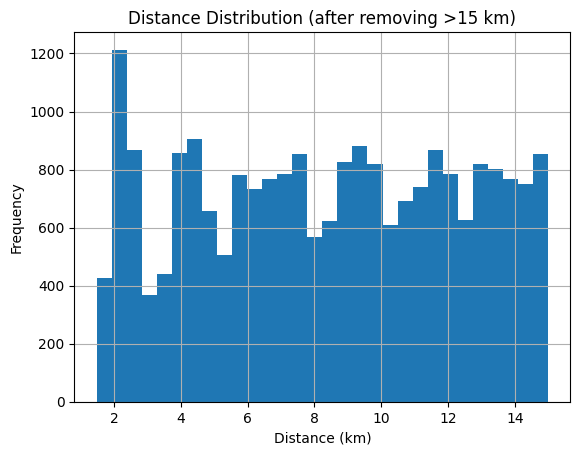

In [8]:
import matplotlib.pyplot as plt

df['distance_km'].hist(bins=30)
plt.title("Distance Distribution (after removing >15 km)")
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.show()

In [9]:
ranges = [
    (0.0, 0.0, 500),
    (0.001, 0.2, 2500),
    (0.201, 0.3, 2500),
    (0.301, 0.5, 2500),
    (0.501, 0.7, 2000),
    (0.701, 1.0, 2000),
    (1.001, 1.485, 2000),
]

# Placeholder for the full synthetic dataset
full_synthetic_df = pd.DataFrame()

def estimate_eta(row):
    # Base time from distance assuming average speed (random within realistic delivery range)
    speed_kmph = np.random.uniform(10, 25)  # 10–25 km/h speed typical in traffic
    base_time = (row['distance_km'] / speed_kmph) * 60  # in minutes

    # Add modifiers based on conditions
    if row['Road_traffic_density'] > 1:
        base_time += np.random.uniform(2, 5)
    if row['Festival'] == 1:
        base_time += np.random.uniform(2, 4)
    if row['multiple_deliveries'] == 1:
        base_time += np.random.uniform(1, 3)
    if row['Vehicle_condition'] == 0:
        base_time += np.random.uniform(1, 2)

    # Add minor noise
    return round(base_time + np.random.uniform(-0.5, 0.5), 2)

for r_start, r_end, count in ranges:
    synthetic_data = {
        'distance_km': np.round(np.random.uniform(r_start, r_end, count), 4),
        'Weather_conditions': np.random.randint(0, 4, count).astype(float),
        'Road_traffic_density': np.random.randint(0, 4, count).astype(float),
        'Vehicle_condition': np.random.randint(0, 2, count).astype(float),
        'multiple_deliveries': np.random.randint(0, 2, count).astype(float),
        'Festival': np.random.randint(0, 2, count).astype(float),
        'City': np.random.randint(0, 3, count).astype(float),
    }

    df1 = pd.DataFrame(synthetic_data)
    df1['Time_taken (min)'] = df1.apply(estimate_eta, axis=1)
    full_synthetic_df = pd.concat([full_synthetic_df, df1], ignore_index=True)

full_synthetic_df.shape

(14000, 8)

In [10]:
features = ['Weather_conditions', 'Road_traffic_density', 'Vehicle_condition', 'multiple_deliveries', 'Festival', 'City', 'distance_km']
print(features)

['Weather_conditions', 'Road_traffic_density', 'Vehicle_condition', 'multiple_deliveries', 'Festival', 'City', 'distance_km']


In [11]:
df.columns

Index(['Unnamed: 0', 'ID', 'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'multiple_deliveries',
       'Festival', 'City', 'Time_taken (min)', 'approx_distance_km',
       'travel_time', 'distance_km'],
      dtype='object')

In [12]:
f = ['Weather_conditions', 'Road_traffic_density', 'Vehicle_condition', 'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)', 'distance_km']
df = df[f]
df.head()

,Weather_conditions,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,City,Time_taken (min),distance_km
0,5.0,3.0,1,1.0,0.0,3.0,23,8.8577
1,4.0,1.0,0,0.0,0.0,3.0,20,4.8283
2,2.0,3.0,1,1.0,0.0,3.0,33,8.7044
3,2.0,4.0,0,1.0,0.0,2.0,15,5.8353
4,4.0,1.0,1,1.0,0.0,3.0,20,2.0596


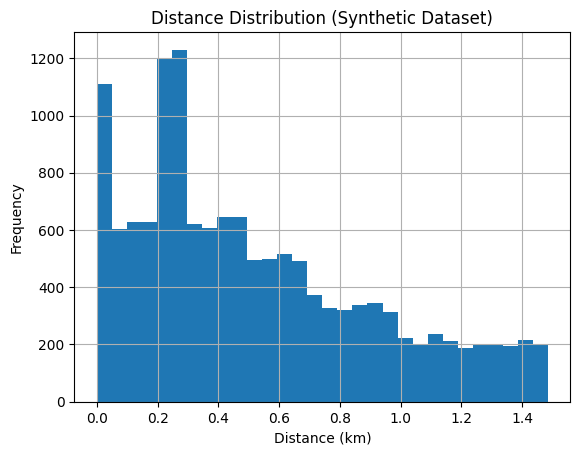

In [13]:
import matplotlib.pyplot as plt

full_synthetic_df['distance_km'].hist(bins=30)
plt.title("Distance Distribution (Synthetic Dataset)")
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.show()

In [14]:
combined_df = pd.concat([df, full_synthetic_df], ignore_index=True)
combined_df.head()

,Weather_conditions,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,City,Time_taken (min),distance_km
0,5.0,3.0,1.0,1.0,0.0,3.0,23.0,8.8577
1,4.0,1.0,0.0,0.0,0.0,3.0,20.0,4.8283
2,2.0,3.0,1.0,1.0,0.0,3.0,33.0,8.7044
3,2.0,4.0,0.0,1.0,0.0,2.0,15.0,5.8353
4,4.0,1.0,1.0,1.0,0.0,3.0,20.0,2.0596


In [15]:
combined_df.shape

(36196, 8)

In [16]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

In [17]:
X = combined_df[features]
X.head()

,Weather_conditions,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,City,distance_km
0,5.0,3.0,1.0,1.0,0.0,3.0,8.8577
1,4.0,1.0,0.0,0.0,0.0,3.0,4.8283
2,2.0,3.0,1.0,1.0,0.0,3.0,8.7044
3,2.0,4.0,0.0,1.0,0.0,2.0,5.8353
4,4.0,1.0,1.0,1.0,0.0,3.0,2.0596


In [19]:
y = combined_df['Time_taken (min)']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [21]:
import lightgbm as lgb

params = {
    'n_estimators': 351,
    'learning_rate': 0.020468063165234227,
    'max_depth': 9,
    'num_leaves': 60,
    'min_child_samples': 47,
    'subsample': 0.6284384317237434,
    'colsample_bytree': 0.7896582974323323,
    'reg_alpha': 0.0019326774481699123,
    'reg_lambda': 0.05070012546687946,
    'random_state': 42
}

model = lgb.LGBMRegressor(**params)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279
[LightGBM] [Info] Number of data points in the train set: 27147, number of used features: 7
[LightGBM] [Info] Start training from score 17.566993
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

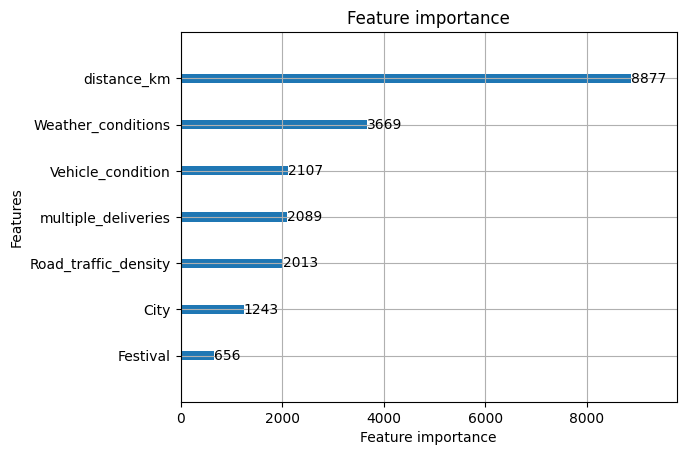

In [22]:
import matplotlib.pyplot as plt

lgb.plot_importance(model)
plt.show()

In [23]:
print("NaNs in y_test:", np.isnan(y_test).sum())
print("NaNs in y_pred:", np.isnan(y_pred).sum())

NaNs in y_test: 0
NaNs in y_pred: 0


In [25]:
mae = mean_absolute_error(y_pred, y_test)
print(mae)

3.159364497754105


In [26]:
errors = np.abs(y_test - y_pred)

In [27]:
error_df = pd.DataFrame({
    'y_true': y_test,
    'y_pred': y_pred,
    'abs_error': errors
})

worst_preds = error_df.sort_values(by='abs_error', ascending=False).head()
print(worst_preds)

       y_true     y_pred  abs_error
8734     54.0  29.190184  24.809816
11873    49.0  25.006677  23.993323
13023    42.0  18.595177  23.404823
7977     48.0  25.141284  22.858716
18362    52.0  29.188380  22.811620


In [28]:
tolerance = mae
correct_within_range = np.abs(y_pred - y_test) <= tolerance
custom_accuracy = np.mean(correct_within_range)
print(f"Custom Accuracy (±{tolerance}): {custom_accuracy * 100:.2f}%")

Custom Accuracy (±3.159364497754105): 64.94%


In [29]:
print("Distance column summary:")
print(X_train['distance_km'].describe())

Distance column summary:
count    27147.000000
mean         5.342007
std          4.918799
min          0.000000
25%          0.602650
50%          4.140800
75%          9.636300
max         14.991500
Name: distance_km, dtype: float64


In [31]:
import joblib

joblib.dump(model, 'model.joblib')

['model.joblib']